In [150]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'BM YEONSUNG'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["axes.unicode_minus"] = False

In [151]:
Data=pd.read_excel("C:/Users/SAMSUNG/Desktop/세미_프로젝트2/정훈/수정데이터/빅데이터.xlsx")
Data.drop(columns=sum([[Data.columns[0]],list(Data.columns[-4:-2])],[]),inplace=True)

In [152]:
dt=pd.DataFrame(Data[(Data["콘텐츠분류"]=="숙박")|(Data["콘텐츠분류"]=="관광지")])

In [153]:
행정구역 = {'구좌':'구좌',
  '조천':'조천', 
  '화북': '동제주','봉개':'동제주', '회천':'동제주','용강':'동제주',
  '오라':'중제주','아라':'중제주','오등':'중제주','화북':'중제주','이도':'중제주','건입':'중제주','삼도':'중제주','용담':'중제주','일도':'중제주', 
  '도두':'서제주','이호':'서제주','외도':'서제주','내도':'서제주','도평':'서제주','노형':'서제주','연동':'서제주','강정':'서제주','도순':'서제주',
  '영남':'서제주','월평':'서제주','해안':'서제주', '노형':'서제주',
  '애월' :'애월',
  '성산':'성산',
  '한림':'한림',
  '표선':'표선',
  '남원':'남원',
  '한경':'한경',
  '안덕':'안덕',
  '영천':'동서귀','동흥':'동서귀','효돈':'동서귀','송산':'동서귀','신효':'동서귀','하효':'동서귀','서귀':'동서귀','보목':'동서귀','동홍':'동서귀',
  '대천':'중서귀','대륜':'중서귀','서홍':'중서귀', '강정':'중서귀','법환':'중서귀','서호':'중서귀','호근':'중서귀',
  '여래':'서서귀','중문':'서서귀','회수':'서서귀', '하원':'서서귀','대포':'서서귀', '색달':'서서귀', '하예':'서서귀', '상예':'서서귀',  
  '대정':'대정'}

In [154]:
def trans(x):
    for i in 행정구역.keys():
        try:
            if i in x:
                return 행정구역[i]
        except:
            break

In [155]:
error=[]
dt.loc[dt["콘텐츠분류"]=="관광지","행정구역"]=dt.loc[dt["콘텐츠분류"]=="관광지","지번주소"].apply(lambda x:trans(x))

In [156]:
숙박=dt[dt["행정구역"].isna()==False]

In [ ]:
plt.figure()
sb.countplot(data=숙박,
             x="행정구역",
             hue="콘텐츠분류")
plt.title("행정구역별 숙박 및 관광지 분포도")

In [157]:
dt2=pd.DataFrame(숙박.groupby(["행정구역","콘텐츠분류"])["평점"].mean()).unstack()

<Axes: xlabel="('평점', '관광지')", ylabel="('평점', '숙박')">

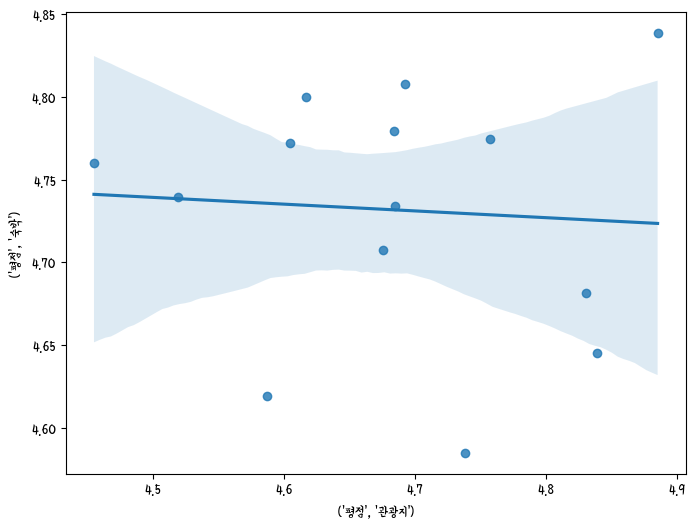

In [158]:
plt.rcParams["figure.figsize"] = (8, 6)
sb.regplot(x=dt2[dt2.columns[0]],
            y=dt2[dt2.columns[1]])

In [162]:
dt3=pd.DataFrame(숙박[숙박["콘텐츠분류"]=="숙박"].groupby(["행정구역"])["평점"].mean())
dt3=dt3.rename(columns={"평점": "평균평점"})
dt3_1=pd.DataFrame(숙박[숙박["콘텐츠분류"]=="관광지"].groupby(["행정구역"])["타이틀"].count())
dt3_1.rename(columns={"타이틀":"관광지개수"},inplace=True)
data3_2=pd.merge(dt3.reset_index(),dt3_1.reset_index()).set_index("행정구역",drop=True)

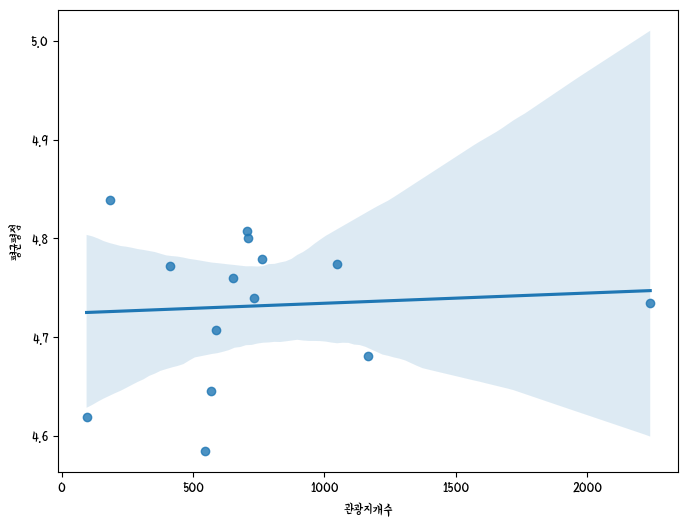

In [163]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.figure()
sb.regplot(x=data3_2[data3_2.columns[1]],
            y=data3_2[data3_2.columns[0]])
plt.show()

In [171]:
dt4=pd.DataFrame(숙박.groupby(["행정구역","콘텐츠분류"])["타이틀"].count()).unstack()

In [173]:
dt4=pd.DataFrame(dt4)

Text(0, 0.5, '숙박업평점')

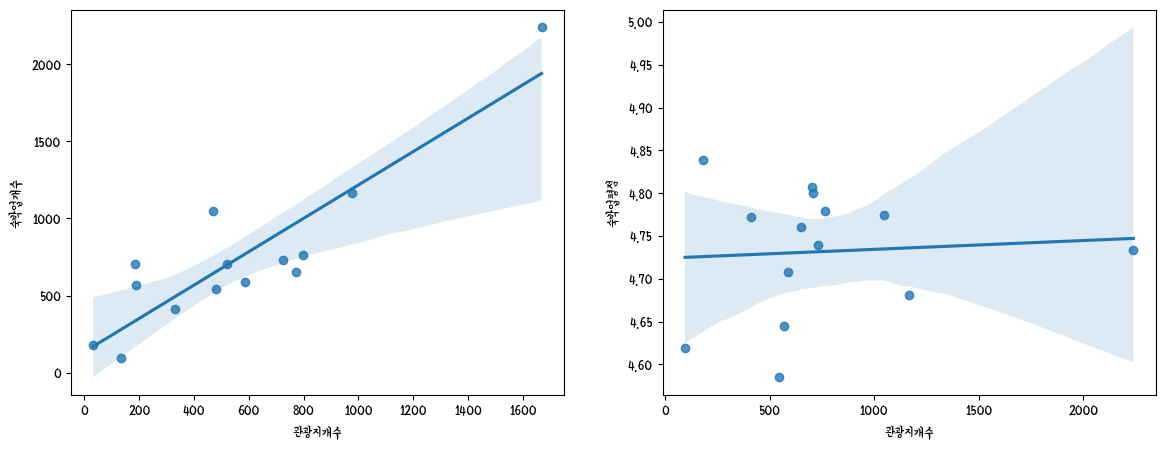

In [175]:
plt.rcParams["figure.figsize"] = (14, 5)
x,y=plt.subplots(1,2)
sb.regplot(ax=y[0],
    x=dt4[dt4.columns[1]],
            y=dt4[dt4.columns[0]])
sb.regplot(ax=y[1],
    x=data3_2[data3_2.columns[1]],
            y=data3_2[data3_2.columns[0]])
y[0].set_xlabel("관광지개수")
y[0].set_ylabel("숙박업개수")
y[1].set_xlabel("관광지개수")
y[1].set_ylabel("숙박업평점")